## Polynomial Regression on Boston Housing Dataset

**In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset**

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s
  
  
  



I**mport the required Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

**Load the Boston Housing DataSet from scikit-learn**

In [2]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

c:\Users\alber\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

**Boston_dataset is a dictionary. let's check what it contains**


In [3]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [6]:
print(boston_dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Load the data into pandas dataframe**

In [8]:
df = pd.DataFrame(boston_dataset['data'], columns=boston_dataset['feature_names'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


**The target values is missing from the data. Create a new column of target values and add it to dataframe in a column called MEDV**

In [9]:
df['MEDV'] = boston_dataset['target']

In [10]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


**Data preprocessing**

Check for missing values in all the columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


**Data Visualization**

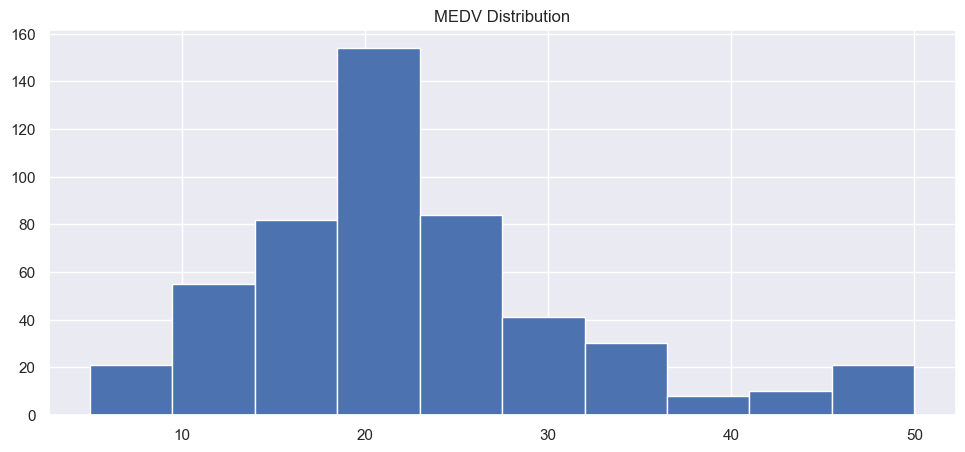

In [16]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,5)})

# plot a histogram showing the distribution of the target values
df['MEDV'].hist()
plt.title('MEDV Distribution');

**Correlation matrix**

Analyze the correlation matrix. Plot a heatmap


*   From coorelation plot: which are the columns that are more highli correlated with **MEDV**

* There are two features highly correlated. Identify them and drop one of them in order to avoid multi-colinearity


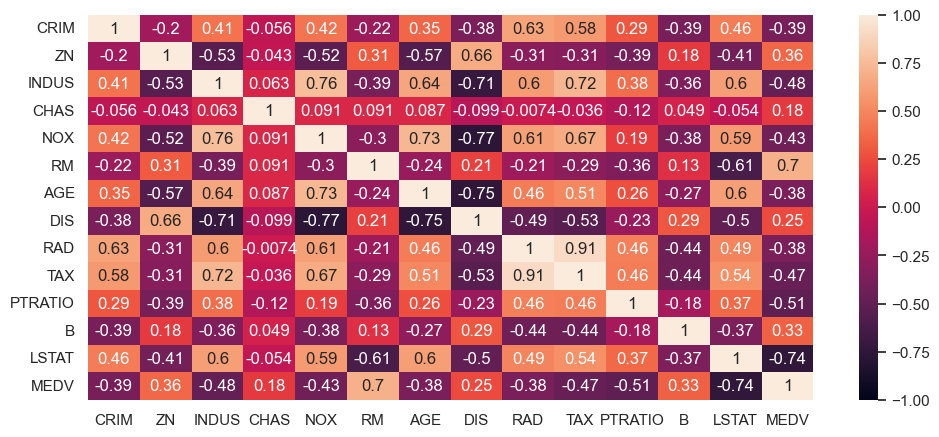

In [17]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True);

In [18]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
X = df.copy()
X.drop(columns='TAX', inplace=True)

### Draw 2 scatter plots to see the relationship between **MEDV** and **LSTAT** and **RM**

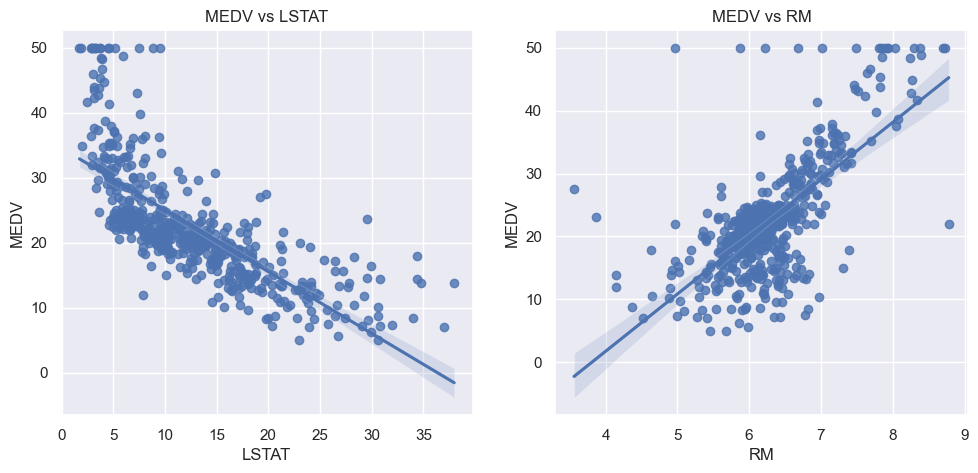

In [36]:
fig, ax = plt.subplots(1, 2)
sns.regplot(x='LSTAT', y='MEDV', data=df, ax=ax[0])
sns.regplot(x='RM', y='MEDV', data=df, ax=ax[1])
ax[0].set_title('MEDV vs LSTAT')
ax[1].set_title('MEDV vs RM');

**Prepare the data for training**
Create a dataframe X including **LSTAT** and **RM** columns.
Y should be a pandas series including target values **'MEDV'**


In [22]:
X = df.copy()
X = X[['LSTAT', 'RM']]
y = df['MEDV']

print(f"Predictors shape: {X.shape}")
print(f"Target shape: {y.shape}")

Predictors shape: (506, 2)
Target shape: (506,)


**Split the data into training and testing sets**

Splits the training and test data set in 80% : 20%. Assign random_state to any value. This ensures consistency. Print the sahes of the resulting objects

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=0)

print(f"TRAIN: {X_train.shape} - {y_train.shape}")
print(f"TEST: {X_test.shape} - {y_test.shape}")

TRAIN: (404, 2) - (404,)
TEST: (102, 2) - (102,)


# **Linear Regression**

Build a linear regression model with sklearn LinearRegression.
We'll use Mean Squared error and R2 score to evaluate our model, so be sure to make the needed imports.

Import the necessary functions and train a LinearRegression model

In [26]:
X.describe()

,LSTAT,RM
count,506.000000,506.000000
mean,12.653063,6.284634
std,7.141062,0.702617
min,1.730000,3.561000
25%,6.950000,5.885500
50%,11.360000,6.208500
75%,16.955000,6.623500
max,37.970000,8.780000


array([[<AxesSubplot: title={'center': 'LSTAT'}>,
        <AxesSubplot: title={'center': 'RM'}>]], dtype=object)

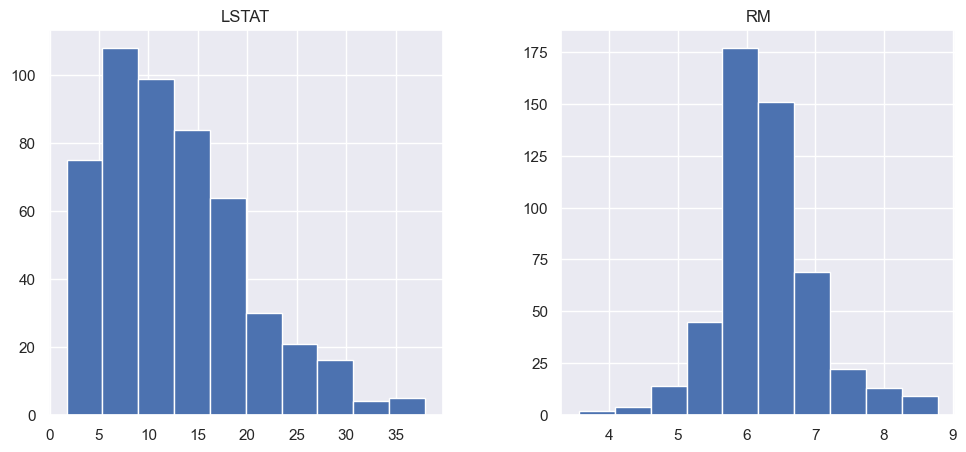

In [27]:
X.hist()

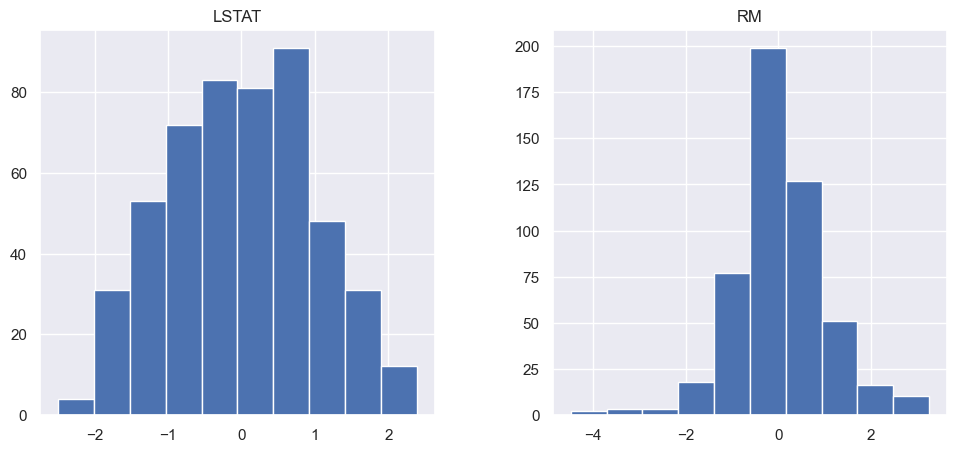

In [29]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

X_pt = pd.DataFrame(pt.fit_transform(X), columns=X.columns)

X_pt.hist();

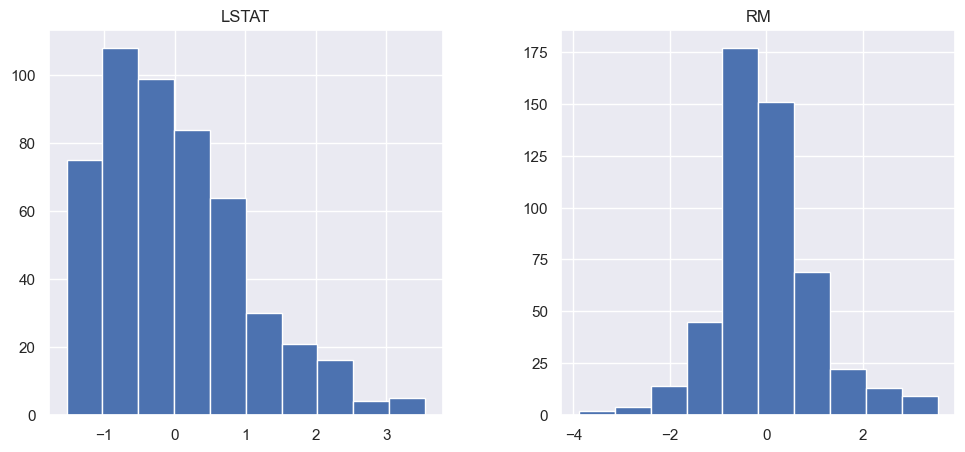

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_sc = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

X_sc.hist();

In [34]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

lm = LinearRegression()
zsc = StandardScaler()

X_train_sc = zsc.fit_transform(X_train)
X_test_sc = zsc.transform(X_test)

lm.fit(X_train_sc, y_train)

y_hat = lm.predict(X_test_sc)

**Evaluate the model performance in the training and testing sets**

In [35]:
# model evaluation for training set
y_hat_train = lm.predict(X_train_sc)

rmse = mean_squared_error(y_train, y_hat_train) ** 0.5
r2 = r2_score(y_train, y_hat_train)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

rmse = mean_squared_error(y_test, y_hat) ** 0.5
r2 = r2_score(y_test, y_hat)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.3656571342244215
R2 score is 0.6618625964841895


The model performance for testing set
--------------------------------------
RMSE is 6.114172522817781
R2 score is 0.5409084827186417


In [37]:
lm.coef_

array([-4.7745712 ,  3.54483302])

In [39]:
lm.intercept_

22.6118811881188

**Lets see the model performance visually. Let's plot y_test vs y_pred**

Plotting the y_test vs y_pred. Ideally should have been a straight line

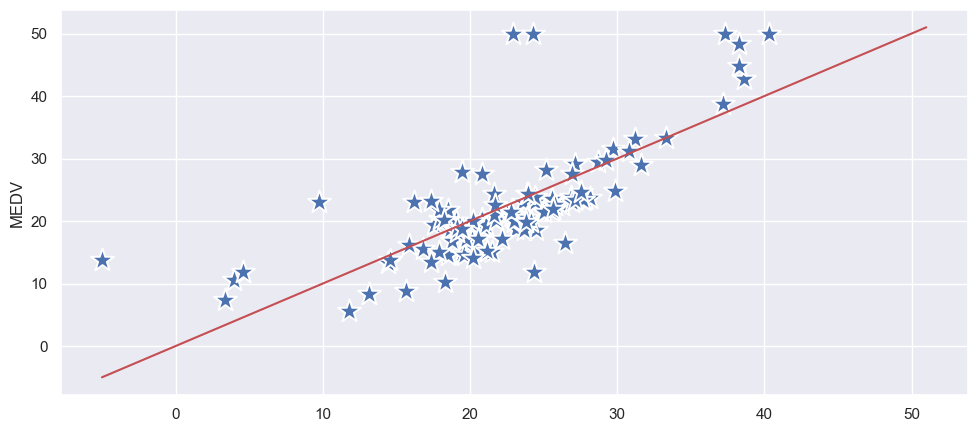

In [56]:
x = np.linspace(-5, 51, 100)

sns.lineplot(x=x, y=x, color='r')
sns.scatterplot(x=y_hat, y=y_test, marker='*', s=300);

<AxesSubplot: ylabel='MEDV'>

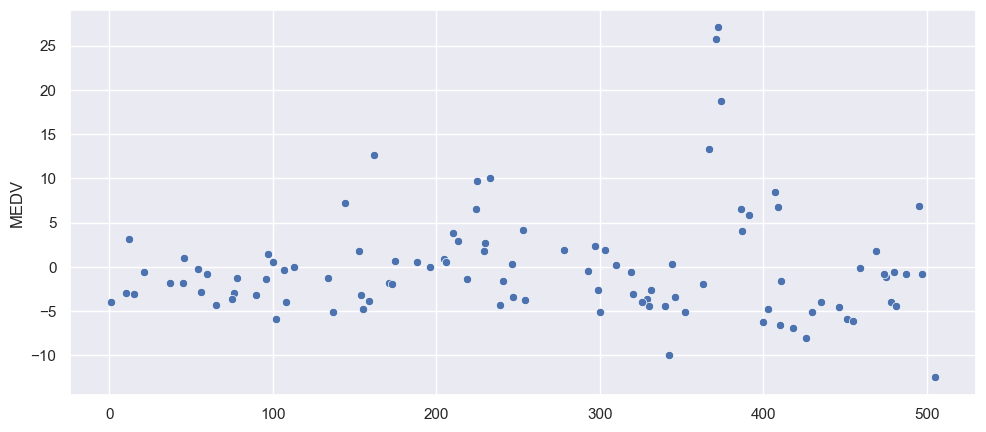

In [57]:
res = y_test - y_hat
sns.scatterplot(res)

<AxesSubplot: ylabel='MEDV'>

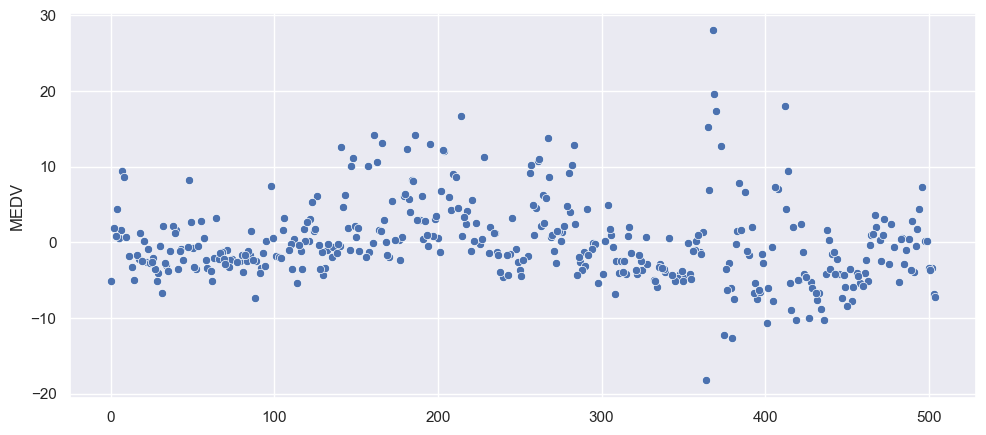

In [58]:
res = y_train - y_hat_train
sns.scatterplot(res)

# **Polynomial Regression**

We can see that **LSTAT** doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with **degree 2** and test. 

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library. 

In [59]:
from sklearn.preprocessing import PolynomialFeatures
lm_pf = LinearRegression()

pf = PolynomialFeatures(2, include_bias=False)
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.transform(X_test)

sc2 = StandardScaler()
X_train_pf_sc = sc2.fit_transform(X_train_pf)
X_test_pf_sc = sc2.transform(X_test_pf)

lm_pf.fit(X_train_pf_sc, y_train)
y_hat_pf_train = lm_pf.predict(X_train_pf_sc)
y_hat_pf = lm_pf.predict(X_test_pf_sc)

rmse_train = mean_squared_error(y_train, y_hat_pf_train) ** 0.5
r2_train = r2_score(y_train, y_hat_pf_train)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

rmse_test = mean_squared_error(y_test, y_hat_pf) ** 0.5
r2_test = r2_score(y_test, y_hat_pf)

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.319658995006362
R2 score of training set is 0.7808475624020519


The model performance for the test set
-------------------------------------------
RMSE of test set is 5.305183490052325
R2 score of test set is 0.6543594328054247


**Did the model improve using the plolynomila model?**

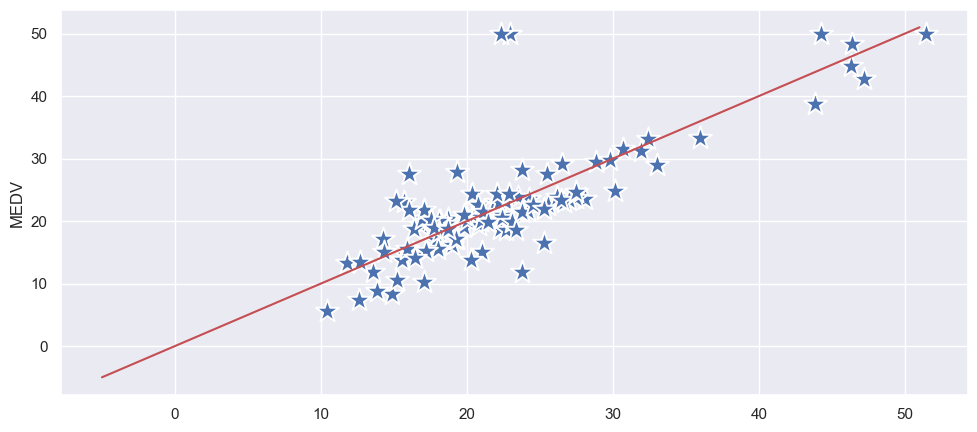

In [60]:
x = np.linspace(-5, 51, 100)

sns.lineplot(x=x, y=x, color='r')
sns.scatterplot(x=y_hat_pf, y=y_test, marker='*', s=300);

<AxesSubplot: ylabel='MEDV'>

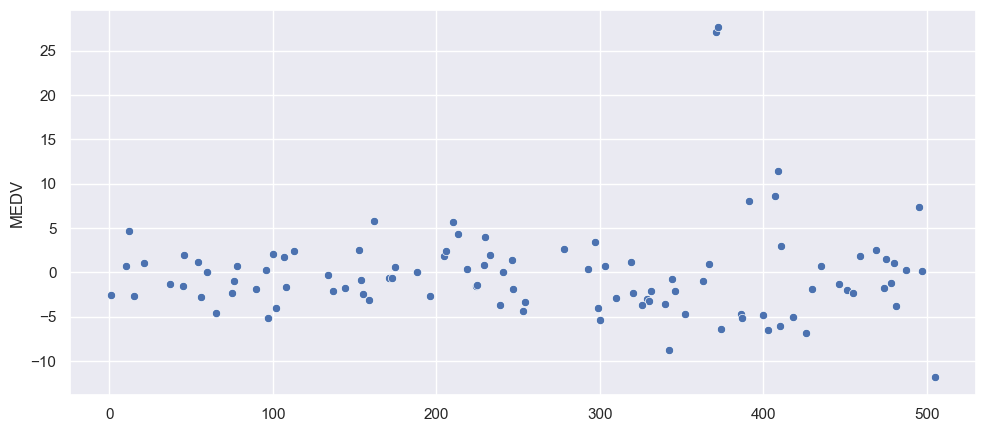

In [61]:
res = y_test - y_hat_pf
sns.scatterplot(res)

<AxesSubplot: ylabel='MEDV'>

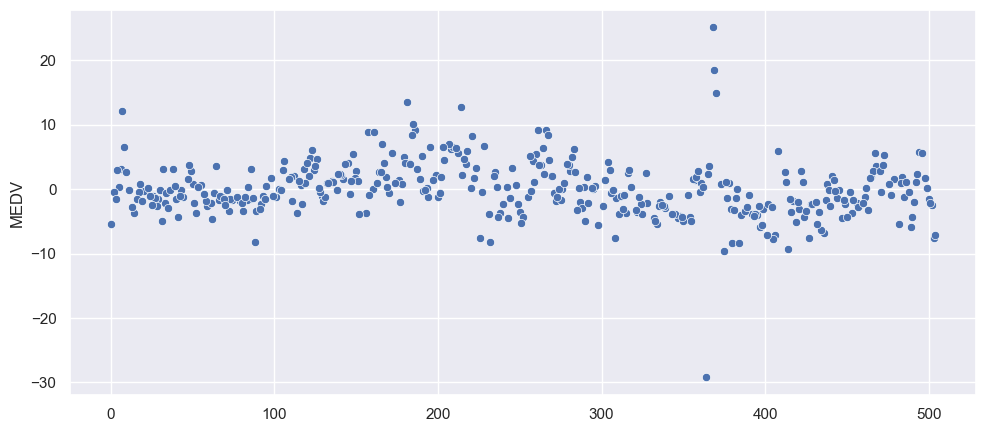

In [62]:

res = y_train - y_hat_pf_train
sns.scatterplot(res)